In [1]:
%matplotlib inline
import os
import h5py
import numpy as np
import pandas as pd
import csv
import re
from matplotlib import pyplot as plt
import seaborn as sns
from io import StringIO
sns.set(font_scale=1.9, style="white")

# Import data

This is all for the MISL tag.

## Dehydrated & sequenced immediately

In [2]:
seq_summary_short = "/path/to/data/MinION_sequencing_data_20191216/guppy_3.2.2_12_16_19_run_01_exec_20200107/sequencing_summary.txt"

In [3]:
f5_meta_short = pd.read_csv(seq_summary_short, header=0, sep="\t")

## Fresh

In [4]:
seq_summary_fresh = "/path/to/data/MinION_sequencing_data_20191011/guppy_3.2.2_10_11_19_run_02_exec_20191014/sequencing_summary.txt"

In [5]:
f5_meta_fresh = pd.read_csv(seq_summary_fresh, header=0, sep="\t")

## Dehydrated & sequenced after 4 weeks

In [13]:
seq_summary_long = "/path/to/data/MinION_sequencing_data_20200121/guppy_3.2.2_01_21_20_run_01_exec_20200121/sequencing_summary.txt"

In [15]:
f5_meta_long = pd.read_csv(seq_summary_long, header=0, sep="\t")

# Accumulate reads over time

## Dehydrated & sequenced immediately

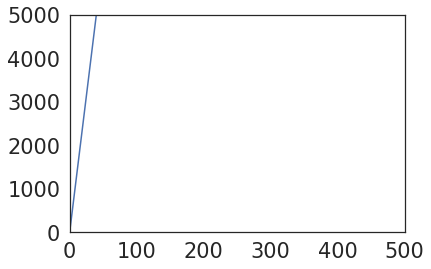

In [16]:
dhd = f5_meta_short.copy()
reads_over_time_bins = []
offset = 200  # Delay in sample loading
bins = np.arange(0, max(dhd["start_time"]), 250)

for bin_end in bins:
    n_reads_so_far = sum(dhd["start_time"] < bin_end + offset)
    reads_over_time_bins.append(n_reads_so_far)
plt.plot(bins, reads_over_time_bins)
# plt.axvline(50)
# plt.axvline(100)
# plt.axvline(150)
# plt.axvline(200)
# plt.axvline(250)
plt.xlim([0, 500])
plt.ylim([0, 5000])
reads_over_time_short = zip(bins, reads_over_time_bins)

## Fresh

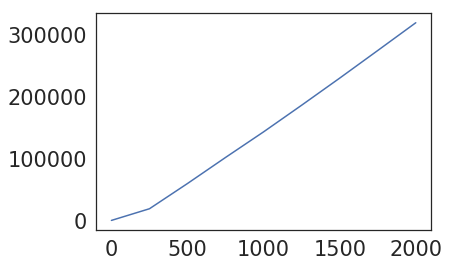

In [17]:
dhd = f5_meta_fresh.copy()
reads_over_time_bins = []
bins = np.arange(0, max(dhd["start_time"]), 250)
for bin_end in bins:
    n_reads_so_far = sum(dhd["start_time"] < bin_end)
    reads_over_time_bins.append(n_reads_so_far)
plt.plot(bins, reads_over_time_bins)
reads_over_time_fresh = zip(bins, reads_over_time_bins)

## 4 weeks

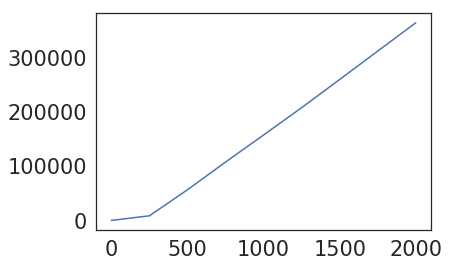

In [18]:
dhd = f5_meta_long.copy()
reads_over_time_bins = []
bins = np.arange(0, max(dhd["start_time"]), 250)
for bin_end in bins:
    n_reads_so_far = sum(dhd["start_time"] < bin_end)
    reads_over_time_bins.append(n_reads_so_far)
plt.plot(bins, reads_over_time_bins)
reads_over_time_long = zip(bins, reads_over_time_bins)

# Plots

In [19]:
bins_mins = [x / 60. for x in bins]

In [20]:
data = {
    "short": {"binned_data": reads_over_time_short,
              "plot_label": "Dehydrated tag (0 days)",
              "color": "tab:green",
              "offset": 250},
    "long": {"binned_data": reads_over_time_long,
              "plot_label": "Dehydrated tag (4 weeks)",
              "color": "tab:blue",
              "offset": 0},
    "fresh": {"binned_data": reads_over_time_fresh,
              "plot_label": "Fresh tag",
              "color": "tab:orange",
              "offset": 0},
}

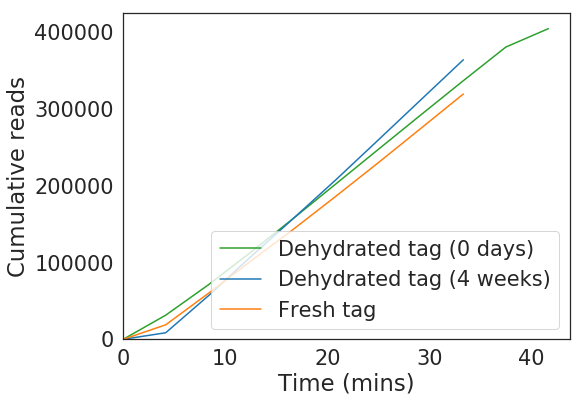

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

for d in data.values():
    bins, reads = zip(*d.get("binned_data"))
    bins_mins = [x / 60. for x in bins]
    
    ax.plot(bins_mins, reads, color=d.get("color"), label=d.get("plot_label"))
    
ax.set_xlabel("Time (mins)")
ax.set_ylabel("Cumulative reads")
ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
ax.legend()
fig.savefig("../plots/dehydrated_comparisons/yield.svg")
fig.savefig("../plots/dehydrated_comparisons/yield.png", dpi=300)